<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Glob_Matching_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Glob Matching

In most modern-day computers, glob patterns are used to refer to multiple file names on the computer's system at once.

Glob patterns typically take advantage of the following two special characters:

1) Wildcards, represented by the `*` symbol, which match any number of characters, including zero characters.
2) Question marks, represented by the `?` symbol, which match any single character (exactly one).
For example, the glob pattern `"*.js"` matches any file name ending in the JavaScript `.js` extension.

Write a function that takes in a file name and a pattern (both strings) and returns whether that file name matches the pattern.

Sample Input

```
fileName = "abcdefg"
pattern = "a*e?g"
```



Sample Output

```
true
```



# Solution 1 : Pointer

In [1]:
# Time = O(max(n,m))
# space = O(1)

# n = len(fileName)
# m = len(pattern)


def globMatching(fileName, pattern):
	filename_pointer = 0
	pattern_pointer = 0
	while filename_pointer <= len(fileName) - 1:
		if pattern_pointer > len(pattern) - 1:
			return False
		elif fileName[filename_pointer] == pattern[pattern_pointer] or pattern[pattern_pointer] =='?':
			pattern_pointer += 1
			filename_pointer += 1
			continue
		elif pattern[pattern_pointer] =='*':
			while pattern_pointer <= len(pattern) - 1 and (pattern[pattern_pointer] == '*'  or pattern[pattern_pointer] == '?'):
				pattern_pointer += 1
			if pattern_pointer > len(pattern) - 1:
				return True
			while fileName[filename_pointer] != pattern[pattern_pointer]:
				filename_pointer += 1
				if filename_pointer > len(fileName) - 1:
					return False
			pattern_pointer += 1
			filename_pointer += 1
			continue
		return False
	
	return pattern_pointer != len(pattern) - 1

In [2]:
pattern = "a*e?g"
fileName = "abcdefg"
globMatching(fileName, pattern)

True

In [3]:
pattern = ""
fileName = "abcdefg"
globMatching(fileName, pattern)

False

## Conceptual Note

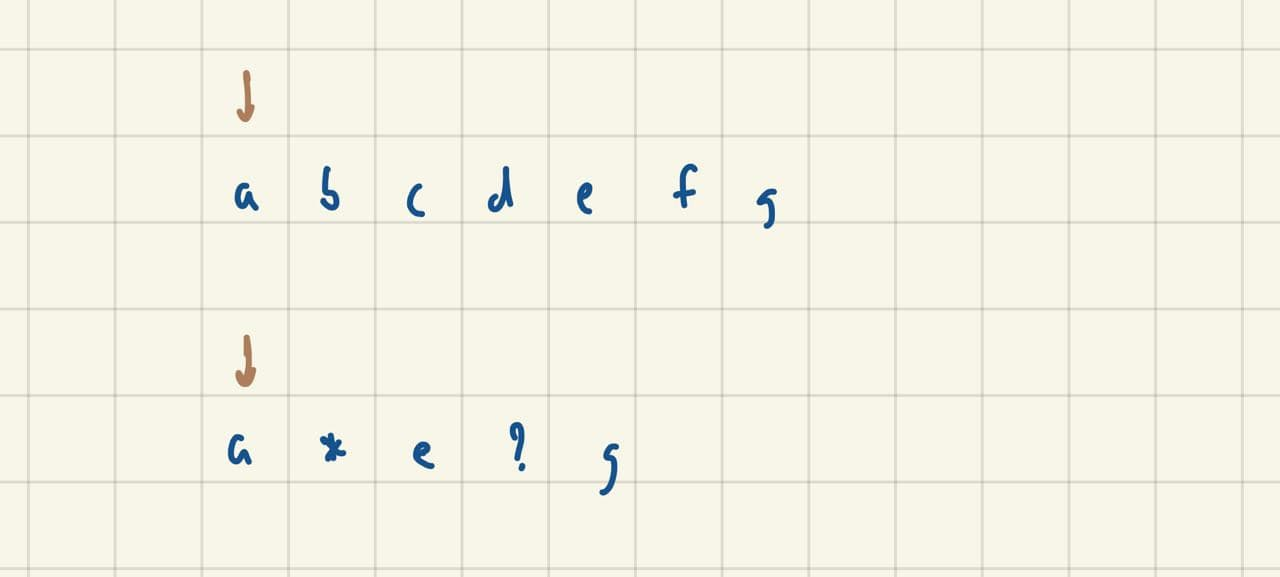

# Solution 2: Dynamic Programming

In [4]:
# Time = O(n * m)
# space = O(n * m)

# n = len(fileName)
# m = len(pattern)


def globMatching(fileName, pattern):
  matchTable = initializeMatchTable(fileName, pattern)
  for i in range(1, len(fileName) + 1):
    for j in range(1, len(pattern) + 1):
      if pattern[j - 1] == '*':
        matchTable[i][j] = matchTable[i][j - 1] or matchTable[i - 1][j]
      elif pattern[j - 1] == '?' or pattern[j - 1] == fileName[i - 1]:
        matchTable[i][j] = matchTable[i - 1][j - 1]
        
  return matchTable[len(fileName)][len(pattern)]


def initializeMatchTable(fileName, pattern):
  matchTable = [[False for _ in range(len(pattern) + 1)] for _ in range(len(fileName) + 1)]
  matchTable[0][0] = True
  for j in range(1, len(pattern) + 1):
    if pattern[j - 1] == "*":
      matchTable[0][j] = matchTable[0][j - 1]
  return matchTable


In [5]:
pattern = "a*e?g"
fileName = "abcdefg"
globMatching(fileName, pattern)

True

In [6]:
pattern = "*"
fileName = "abcdefg"
globMatching(fileName, pattern)

True

In [7]:
pattern = "*****a*?f*********g"
fileName = "abcdefg"
globMatching(fileName, pattern)

True

## Conceptual Note

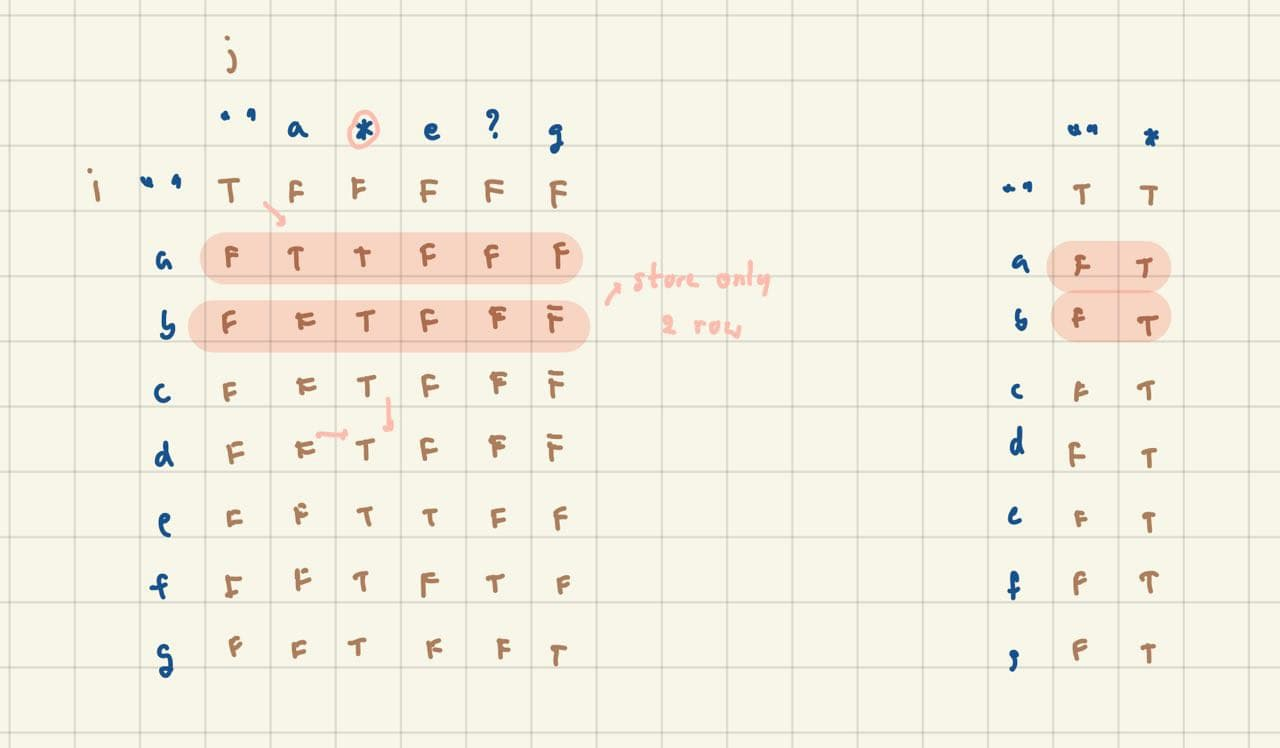